# Curve fitting - Linearizable nonlinear regression

by Xiaofeng Liu, Ph.D., P.E.
Associate Professor

Department of Civil and Environmental Engineering

Institute of CyberScience

Penn State University 

223B Sackett Building, University Park, PA 16802

Web: http://water.engr.psu.edu/liu/

---

## Least-squares regression

Let's assume the given set of data is denoted as $(x_i, y_i)$, $i\in(0,N-1)$. Here the total number of data points is $N$. Note that here the index starts at 0 to be consistent with the zero-based index in Python. In lecture notes and the book, the index starts at 1. 

### Linearizable nonlinear curve fitting

In many applications, the relationship is nonlinear and thus does not make sense to force a linear curve fitting. Nonlinear curve fitting is much more difficult and we have a separate section for it. But here, we introduce some transformation techniques which can be used to linearize nonlinear curve fitting. 

We discuss three categories of linearizable nonlinear curve fitting:
* exponential equation
\begin{equation}
y = a_0 e^{a_1 x}
\end{equation}
where $a_0$ and $a_1$ are fitting coefficients. Taking natural logarithm to both sides of the equation gives
\begin{equation}
\ln y = \ln a_0 + a_1 x
\end{equation}
Therefore, a linear curve fitting now is sought between $x$ and $\ln y$. And the interception is $\ln a_0$ and the slope is $a_1$.

* power equation
\begin{equation}
y = a_0 x^{a_1}
\end{equation}
Again taking natural logarithm gives
\begin{equation}
\ln y = \ln a_0 + a_1 \ln x
\end{equation}
and the linear curve fitting is sought between $\ln x$ and $\ln y$. And the interception is $\ln a_0$ and the slope is $a_1$.

* Monod-type equation (or saturation-growth-rate equation)
\begin{equation}
y = a_0 \frac{x}{a_1 + x}
\end{equation}
As a side note to the Monod equation, it is very commonly used in environmental engineering, for example for the modeling of the activated sludge for sewage treatment. Here, $y$ is the specific growth rate of microorganisms, $a_0$ is the maximum specific growth rate, $x$ is the concentration of the limiting nutrient, $a_1$ is the half-saturation constant, i.e., the value of $x$ when the growth rate is half of the maximum. 

By inversion, one can get
\begin{equation}
\frac{1}{y} = \frac{a_1}{a_0} \frac{1}{x} + \frac{1}{a_0}
\end{equation}
and the linear curve fitting is sought between $\frac{1}{y}$ and $\frac{1}{x}$ with the slope of $\frac{a_1}{a_0}$ and the interception of $\frac{1}{a_0}$.

The following example shows the fitting of a Monod-type equation. Please note that the following code calls the **calculate_linear_regression_coef(...)** function defined above. So you have to run the code cell above first. Or you can copy and paste the function definition in the following code cell. 

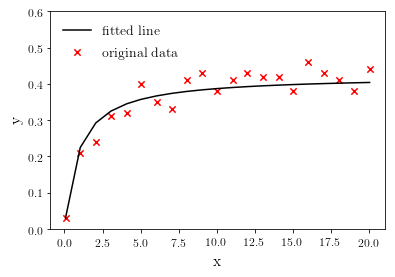

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#calculate the two linear regression coefficients
#and also the r2 value
def calculate_linear_regression_coef(x, y): 
    if(np.size(x) != np.size(y)):
        sys.exit("The two vectors x and y are not of the same length.")

    # number of observations/points 
    n = np.size(x)

    sx = np.sum(x)
    sy = np.sum(y)

    sx2 = np.inner(x,x)
    sxy = np.inner(x,y)
    sy2 = np.inner(y,y)

    # calculating regression coefficients 
    a1 = (n*sxy - sx*sy)/(n*sx2 - sx**2)
    a0 = sy/n - a1*sx/n

    r2 = ((n*sxy-sx*sy)/np.sqrt(n*sx2-sx**2)/np.sqrt(n*sy2-sy**2))**2;

    return(a0, a1, r2) 

plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

# measurement data in Numpy array format
x=np.array([0.07, 1.04,2.06, 3.06, 4.09, 5.01, 6.05, 7.05, 8.02, 9.03, 10.03, 11.07,12.01,13.02,14.08, 15.01, 16.01, 17.04, 18.01, 19.03, 20.05])
y=np.array([0.03, 0.21, 0.24, 0.31, 0.32, 0.40, 0.35, 0.33, 0.41, 0.43, 0.38, 0.41, 0.43, 0.42, 0.42, 0.38, 0.46, 0.43, 0.41, 0.38, 0.44])

xinv = 1.0/x
yinv = 1.0/y

# calculate the linear regression coefficients 
alpha, beta, r2 = calculate_linear_regression_coef(xinv, yinv) 

# plotting the original data points
plt.scatter(x, y, c = "r", marker = "x", s = 40, label='original data') 

#back-calculate the coefficients
a0 = 1.0/alpha
a1 = beta/alpha

# predicted value using the fitting curve
y_pred = a0 * (x / (a1 + x)) 

# plotting the regression line 
#plt.plot(x, y_pred, color = "k", label='fitted line: $y$ = %.2f $ x/(%.2f + x$)'%(a0, a1)) 
plt.plot(x, y_pred, color = "k", label='fitted line') 

#plt.text(10,0.2,r'$r^2$ = %.2f'%r2, fontsize=14)

plt.xlabel('x',fontsize=16) 
plt.ylabel('y',fontsize=16) 

plt.ylim([0, 0.6])

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='upper left',fontsize=14,frameon=False)

plt.savefig("monod_type_fitting.png",dpi=300, bbox_inches='tight', pad_inches=0)

plt.show() 